### 1. Открываем файлы с данными и объединяем их в один датафрейм. 


In [ ]:
# импортиуем библиотеки для работы
import pandas as pd
import seaborn as sns
import math
import re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore') # отключаем предупреждения
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv') # открываем файл
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv') # открываем файл
display(mkrf_movies.head())
display(mkrf_shows.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [ ]:
# смотрим информацию о файлах
mkrf_movies.info()
print('\n')
mkrf_shows.info()
pd.options.display.float_format = '{:,.2f}'.format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Файл mkrf_movies состоит из 15 колонок, файл mkrf_shows состоит из двух колонок.  
Для объединения этих двух файлов можно использовать один общий столбец puNumber.

In [ ]:
# приводим названия стобцов к единому стилю:
mkrf_movies = mkrf_movies.rename(columns={'puNumber':'pu_number'})
mkrf_shows = mkrf_shows.rename(columns={'puNumber':'pu_number'})
# приводим к единому типу данных для объединения:
mkrf_movies['pu_number'] = mkrf_movies['pu_number'].astype(str)
mkrf_shows['pu_number'] = mkrf_shows['pu_number'].astype(str)
# объединяем две таблицы в одну:
data = mkrf_movies.merge(mkrf_shows, on='pu_number', how = 'left')
display(data.head()) # проверяем результат

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Объединение данных файлов прошло успешно.

In [ ]:
# проверяем количество получившихся строк:
mkrf_movies.info() # до "склеики"
data.info() # после "склейки"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Как мы видим до объединения было 7486 строк, так и после объединения осталось тоже количество строк 7486.  
Добавился стобец box_office, что и требовалось.

### 2. Предобработка данных

#### 2.1. Проверяем и преобразовываем типы данных

In [ ]:
# преобразуем форматы данных:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')
data['ratings'].unique() # перед преобразованием смотрим на аномалии

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Рейтинг местами указан в %.  
В таких позициях символ % моно удалять и значение делить на 10. Это будет рейтингом.

In [ ]:
# работа с аномалиями:
data['ratings'] = data['ratings'].str.strip("%") # убираем %
# приводим к общему формату путем замен
data = data.apply(lambda x: x.replace({'99':'9.9', '28': '2.8', '97': '9.7', '83': '8.3', '64': '6.4', '91':'9.1', '94':'9.4', '62':'6.2', '79':'7.9', '90':'9.0', '88':'8.8', '89':'8.9', '98':'9.8'}, regex=True))
data['ratings'] = data['ratings'].astype(float) # устанавливаем тип данных дробные числа
data['ratings'].unique() # провряем результат

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4,  9.9,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9,  2.8,  3.7,  1.4,  3.1,  9.7,  3.5,
        3.2,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6,  9.1,  9.4,  9. ,
       19. ,  1. ,  8.9,  1.3,  1.9,  1.8,  1.2,  1.7,  9.8])

Замена проведена успешно. Есть пропущенные значения, но пока их не будем трогать и посмотрим на пропуски.

#### 2.2. Изучаем пропуски в данных

In [ ]:
# ищем пропущенные значения:
print(data.isna().sum())
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') # % пропущенных значений

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64


,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


refundable_support, nonrefundable_support, budget, financing_source имеют наибольшее количество пропусков - 96%  
box_office - 58%  
ratings и genres - 13%  
с таким высоким % пропусков не будем выполнять заполнение значениями

In [ ]:
# для удобства заполняем пропущенные значения с большим % пропусков:
data['financing_source'] = data['financing_source'].fillna('unknown')
data['ratings'] = data['ratings'].fillna('unknown')
data['genres'] = data['genres'].fillna('unknown')
print(data.isna().sum())

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source            0
ratings                     0
genres                      0
box_office               4328
dtype: int64


#### 2.3. Изучаем дубликаты в датафрейме


In [ ]:
# проверяем наличие явных дубликатов
print('Явных дубликатов:', data.duplicated().sum())

Явных дубликатов: 0


In [ ]:
# проверяем на наличие неявных дубликатов:
print('Количество неявных дубликатов по столбцу pu_number -', data['pu_number'].duplicated().sum())
print('Количество неявных дубликатов по столбцу title -', data['title'].duplicated().sum())

Количество неявных дубликатов по столбцу pu_number - 2
Количество неявных дубликатов по столбцу title - 714


In [ ]:
# смотрим на дубликаты прокатных удостоверений:
data[data.duplicated(subset=['pu_number'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,6.80,"комедия,криминал",NaN


Эти прокатные удостоверения не являются дубликатами.  
У прокатного удостоверения 221154310 разные названия фильмов, у прокатного удостоверения 221054410 разные возрастные категории и рейтинги.  
Скорее всего произошла ошибка при заполнении.  
Эти прокатные удостоверения можно переименовать, например добавив по одному индексу в конце.  

In [ ]:
# переименовываем "дубликаты":
data.loc[((data['pu_number'] == '221154310') & (data['title'] == 'Как жениться и остаться холостым')), 'pu_number'] = 2211543100
data.loc[((data['pu_number'] == '221054410') & (data['title'] == 'Анализируй то!')), 'pu_number'] = 2210544100
print('Количество неявных дубликатов по столбцу pu_number -', data['pu_number'].duplicated().sum())

Количество неявных дубликатов по столбцу pu_number - 0


In [ ]:
# работаем с дубликатами фильмов:
# смотрим на дубликаты прокатных удостоверений:
data[data.duplicated(subset=['title'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,2210269.16,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,1210359.19,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,1210369.19,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.80,"триллер,криминал,детектив",NaN


В столбце pu_number обнаружились аномалии. В некоторых значениях есть точки, их нужно удалить.

In [ ]:
# удаляем точки из pu_number:
data['pu_number'] = data['pu_number'].str.replace('.','')


In [ ]:
# смотрим и пытаемся понять где же дубликаты в title:
data[data.duplicated(subset=['title'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.80,"триллер,криминал,детектив",NaN


#### 2.4 Изучаем категоральные значения

In [ ]:
# изучаем категоральные столбцы:
print('pu_number', data['pu_number'].nunique()) # количество уникальных значений по столбцу
print('title', data['title'].nunique()) # количество уникальных значений по столбцу
print(data['title'].unique())
print('type', data['type'].nunique()) # количество уникальных значений по столбцу
print(data['type'].unique())
print('film_studio', data['film_studio'].nunique()) # количество уникальных значений по столбцу
print(data['film_studio'].unique())
print('production_country', data['production_country'].nunique()) # количество уникальных значений по столбцу
print(data['production_country'].unique())
print('director', data['director'].nunique()) # количество уникальных значений по столбцу
print(data['director'].unique())
print('producer', data['producer'].nunique()) # количество уникальных значений по столбцу
print(data['producer'].unique())
print('age_restriction', data['age_restriction'].nunique()) # количество уникальных значений по столбцу
print(data['age_restriction'].unique())
print('financing_source', data['financing_source'].nunique()) # количество уникальных значений по столбцу
print(data['financing_source'].unique())
print('genres', data['genres'].nunique()) # количество уникальных значений по столбцу
print(data['genres'].unique())

pu_number 7484
title 6772
['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']
type 8
['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']
film_studio 5490
['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 ...
 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента '
 'Никелодеон Анимейшн Студиос, Спин Мастер'
 'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"']
production_country 950
['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая

В некоторых позициях в начале и конце есть пробелы, которые нужно удалить.

In [ ]:
# удаляем пробелы в начале и конце значений
data['pu_number'] = data['pu_number'].str.strip()
data['title'] = data['title'].str.strip()
data['type'] = data['type'].str.strip()
data['film_studio'] = data['film_studio'].str.strip()
data['production_country'] = data['production_country'].str.strip()
data['director'] = data['director'].str.strip()
data['producer'] = data['producer'].str.strip()
data['age_restriction'] = data['age_restriction'].str.strip()
data['financing_source'] = data['financing_source'].str.strip()
data['genres'] = data['genres'].str.strip()

#### 2.5. Проверяем количественные значения

In [ ]:
display(data['budget'].describe())
display(data['refundable_support'].describe())
display(data['nonrefundable_support'].describe())

count             332.00
mean      127,229,716.68
std       188,588,333.12
min                 0.00
25%        42,000,000.00
50%        68,649,916.00
75%       141,985,319.50
max     2,305,074,303.00
Name: budget, dtype: float64

count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

В каждом столбце есть нулевые зачения. Посмотрим какие значения соотвутствуют колонке budget = 0.

In [ ]:
# формируем таблицу по бюджету = 0
pd.DataFrame(data[data['budget'] == 0][['title','budget','refundable_support','nonrefundable_support']])

,title,budget,refundable_support,nonrefundable_support
2053,14+,0.00,0.00,"23,000,000.00"
2058,Дуxless 2,0.00,0.00,"75,000,000.00"
2472,Воин (2015),0.00,"10,000,000.00","70,000,000.00"
2532,Бармен.,0.00,"20,000,000.00",0.00
2615,Савва. Сердце воина,0.00,"60,000,000.00","100,000,000.00"
2684,Тряпичный союз,0.00,0.00,"59,000,000.00"
2788,Срочно выйду замуж,0.00,0.00,"35,000,000.00"
2874,Помню - не помню!,0.00,0.00,"6,000,000.00"
3047,Любовь с ограничениями,0.00,"19,000,000.00","51,000,000.00"
3565,Притяжение (2016),0.00,0.00,"250,000,000.00"


Видим явную ошибку при заполнении.  
Финансирование выделялось, но общего бюджета нет.  
Таких позиций немного, они не будут значительно влиять на результат.

In [ ]:
# заполняем пропущенные значения бюджета по информации с сайта Кинопоиск:
data.loc[((data['budget'] == 0) & (data['title'] == '14+')), 'budget'] = 30000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Дуxless 2')), 'budget'] = 168000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Воин (2015)')), 'budget'] = 115000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Бармен.')), 'budget'] = 60000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Савва. Сердце воина')), 'budget'] = 1000000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Тряпичный союз')), 'budget'] = 250000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Срочно выйду замуж')), 'budget'] = 84000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Помню - не помню!')), 'budget'] = 78000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Любовь с ограничениями')), 'budget'] = 110000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Притяжение (2016)')), 'budget'] = 380000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Чудо-юдо')), 'budget'] = 144000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Мифы')), 'budget'] = 50000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Селфи')), 'budget'] = 115000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Два хвоста')), 'budget'] = 110000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Принцесса и дракон')), 'budget'] = 300000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Баба Яга')), 'budget'] = 220000000
data.loc[((data['budget'] == 0) & (data['title'] == 'Большое путешествие')), 'budget'] = 80000000
# проверям выполненные замены:
pd.DataFrame(data[data['budget'] == 0][['title','budget','refundable_support','nonrefundable_support']]) 

,title,budget,refundable_support,nonrefundable_support


In [ ]:
# проверим фильмы, бюджет которых меньше размера гос. поддержки:
pd.DataFrame(data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])][['title','budget','refundable_support','nonrefundable_support']])

,title,budget,refundable_support,nonrefundable_support
6823,Большое путешествие,"80,000,000.00","60,000,000.00","120,000,000.00"


Есть только один фильм с бюджетом меньше, чем размер гос. поддержки. Вероятно это ошибка при занесении информации либо на Кинопоиск, либо в датафрейм.  
Количество таких фильмов немного, можно заменить бюджет этого фильма на сумму гос. поддержки.

In [ ]:
# выполняем заполняем аномальное значение
data.loc[((data['budget'] == 80000000) & (data['title'] == 'Большое путешествие')), 'budget'] = data['refundable_support'] + data['nonrefundable_support']
# проверяем результа:
pd.DataFrame(data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])][['title','budget','refundable_support','nonrefundable_support']])

,title,budget,refundable_support,nonrefundable_support


count             332.00
mean      137,452,608.25
std       193,327,660.02
min        14,462,464.00
25%        46,186,570.25
50%        75,470,538.00
75%       154,431,690.25
max     2,305,074,303.00
Name: budget, dtype: float64


<AxesSubplot:>

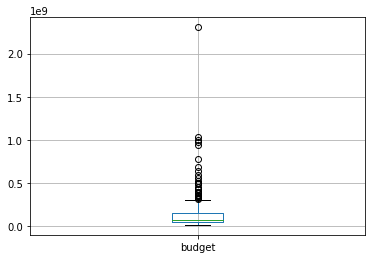

In [ ]:
# смотрим на выбросы:
print(data['budget'].describe())
data.boxplot(column = 'budget')

В данных есть один фильм с аномальным размером бюджета.

In [ ]:
# посмотрим что это за фильм:
display(data.query('budget == 2305074303.0'))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения,фэнтези","333,597,059.59"


Проверка размера бюджета на сайте Кинопоиска подтверждает, что бюджет корректный.

<AxesSubplot:xlabel='budget', ylabel='budget'>

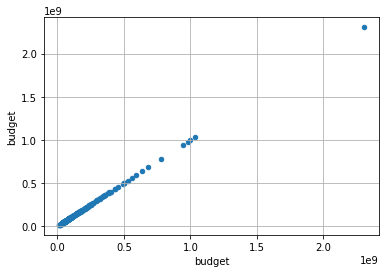

In [ ]:
# построим диаграмму рассеяния, посмотрим как влияет этот выброс
data.plot(x = 'budget', y = 'budget', kind = 'scatter', grid = True)

График показывает, что этот выброс находится на одной линии с остальными данными и незначительно влияет на линию регрессии.  
Эту позицию можно не удалять.

#### 2.6 Добавляем новые столбцы





In [ ]:
# создаем столбец с информацией о годе проката:
data['year_release'] = data['show_start_date'].dt.year

In [ ]:
# создаем столбца с именем и фамилией главного режиссера и столбец с жанром
data['director'] = data['director'].astype(str)
data['genres'] = data['genres'].astype(str)
def producer_genre(d):
    values = d.split(',')
    return values[0]
data['main_director'] = data['director'].apply(producer_genre)
data['main_genre'] = data['genres'].apply(producer_genre)
data.head() # проверяем результат

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,unknown,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


In [ ]:
# создаем новый столбец с долей гос. поддержки в бюджете в %:
data['part_support_%'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']*100
display((data[data['part_support_%'] > 0]).head()) # проверяем результат

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release,main_director,main_genre,part_support_%
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,unknown,unknown,"28,140.00",2014,А.Якимчук,unknown,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,62.48


### 3. Исследовательский анализ данных

,year_release,quantity_films
0,2010,985
1,2011,622
2,2012,593
3,2013,630
4,2014,807
5,2015,705
6,2016,818
7,2017,505
8,2018,891
9,2019,930


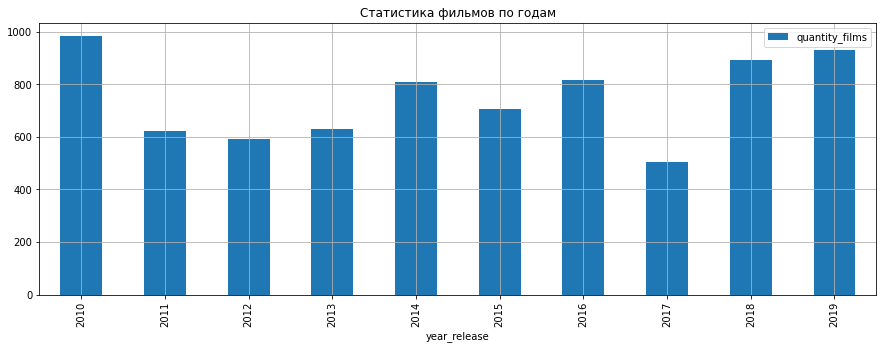

In [ ]:
# получаем статистику фильмов по годам
year_release_number_films = data.groupby('year_release')['title'].count().reset_index()
year_release_number_films.rename(columns={'title':'quantity_films'}, inplace=True)
year_release_number_films.plot(kind='bar', x='year_release', figsize = (15, 5), grid = True, title='Статистика фильмов по годам', legend = True)
display(year_release_number_films)

Самое большое количество фильмов выходило в 2010 году.  
Самое маленькое количество фильмов выходило в 2017 году.

In [ ]:
# формулировки о доле в задании не ясна
print('Доля фильмов с информацией об его бюджете: %.2f' % (data['budget'].count()/data['title'].count()*100))

Доля фильмов с информацией об его бюджете: 4.43


,year_release,total_fees
8,2018,"49,668,403,134.32"
7,2017,"48,563,707,217.51"
9,2019,"48,425,708,779.59"
6,2016,"47,866,299,741.91"
5,2015,"39,497,365,196.40"
4,2014,"7,444,951,859.20"
3,2013,"29,799,706.20"
1,2011,"14,102,765.00"
2,2012,"6,955,423.00"
0,2010,"2,428,654.00"


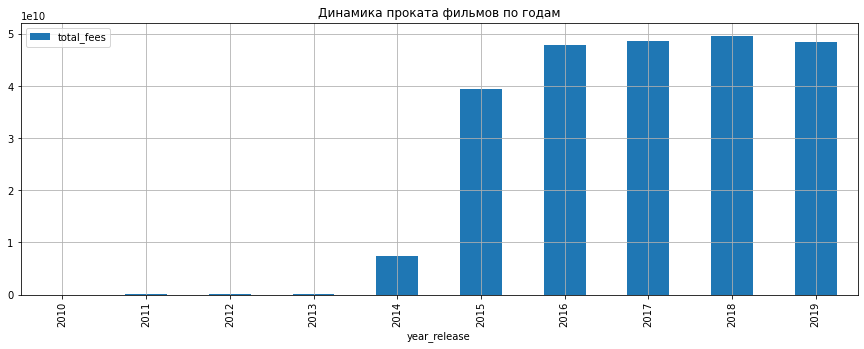

In [ ]:
# получаем динамику проката по годам:
data['box_office'] = data['box_office'].astype(float)
year_release_total_fees = data.groupby('year_release')['box_office'].sum().reset_index()
year_release_total_fees.rename(columns={'box_office':'total_fees'}, inplace=True)
year_release_total_fees.plot(kind = 'bar', x = 'year_release',figsize = (15, 5), grid = True, title='Динамика проката фильмов по годам', legend = True)
year_release_total_fees = year_release_total_fees.sort_values(by='total_fees', ascending=False)
display(year_release_total_fees)

Максимальная сумма сборов приходилась на 2018 год (с небольшим отрывом от 2016, 2017 и 2019 годов).  
Минимальная сумма сборов приходилась на 2010 год.  
При том, что самое большое количество фильмов вышло в 2010 году.

,mean,median
year_release,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.92","3,522.50"
2014,"26,684,415.27","18,160.00"
2015,"84,940,570.31","4,920,933.00"
2016,"91,000,569.85","3,846,679.41"
2017,"136,032,793.33","9,968,340.00"
2018,"104,565,059.23","8,891,102.21"


<AxesSubplot:title={'center':'Медианная и средняя сумма сборов по годам'}, xlabel='Годы', ylabel='Кассовые сборы'>

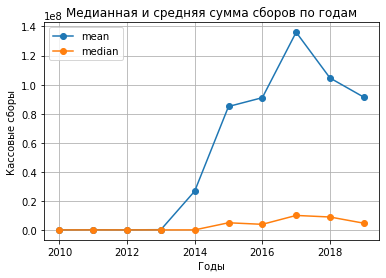

In [ ]:
fees_film = data.pivot_table(index = 'year_release', values = 'box_office', aggfunc = ('mean', 'median'))
display(fees_film)
fees_film.plot(title = 'Медианная и средняя сумма сборов по годам', style = 'o-', grid = True, xlabel = 'Годы', ylabel = 'Кассовые сборы')

По графику видно, что среднее существенно отличается от медианы, можно сделать вывод, что по некоторым фильмам присутствуют выбросы, которые и влияют на такое отличие медианы и среднего.

,box_office
age_restriction,
«16+» - для детей старше 16 лет,"76,034,733,643.63"
«12+» - для детей старше 12 лет,"60,619,446,628.33"
«6+» - для детей старше 6 лет,"55,798,610,799.68"
«18+» - запрещено для детей,"40,759,615,572.12"
«0+» - для любой зрительской аудитории,"809,077,425.97"


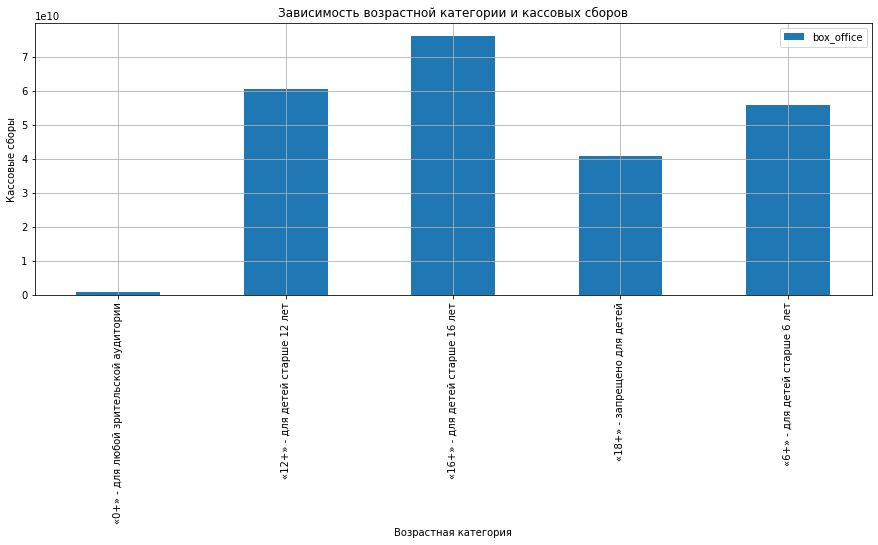

In [ ]:
data_year_release = data.query('year_release > 2014') # выполняем срез по годам
age_restriction_fees = data_year_release.pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = 'sum')
age_restriction_fees.plot(kind='bar', title = 'Зависимость возрастной категории и кассовых сборов', style = 'o-', grid = True, xlabel = 'Возрастная категория', ylabel = 'Кассовые сборы', figsize=(15, 5))
display(age_restriction_fees.sort_values(by='box_office', ascending = False))

Возрастное ограничение влияет на кассовые сборы.  
В среднем по годам исследуемым годам максимальные кассовые сборы приходятся на категорию 16+, далее идет 12+, 6+ и 18+. Наименьшие сборы у категории 0+.

box_office
year_release age_restriction                                         
2017         «16+» - для детей старше 16 лет        18,745,042,900.06
2016         «16+» - для детей старше 16 лет        16,664,548,541.74
2018         «16+» - для детей старше 16 лет        16,503,602,346.96
             «12+» - для детей старше 12 лет        14,267,291,660.69
2015         «12+» - для детей старше 12 лет        13,616,082,008.91
2019         «6+» - для детей старше 6 лет          12,852,548,650.86
             «16+» - для детей старше 16 лет        12,753,418,984.60
             «12+» - для детей старше 12 лет        12,680,198,773.67
2016         «12+» - для детей старше 12 лет        12,204,446,524.39
2017         «6+» - для детей старше 6 лет          12,086,142,145.76
2016         «6+» - для детей старше 6 лет          12,053,146,008.24
2015         «16+» - для детей старше 16 лет        11,368,120,870.27
2019         «18+» - запрещено для детей            10,121,796,303.64
2018         «6+» - для детей старше 6 лет          10,104,974,623.41
2017         «18+» - запрещено для детей             9,651,495,581.02
2018         «18+» - запрещено для детей             8,760,085,501.15
2015         «6+» - для детей старше 6 лет           8,701,799,371.41
2017         «12+» - для детей старше 12 лет         7,851,427,660.67
2016         «18+» - запрещено для детей             6,793,929,818.87
2015         «18+» - запрещено для детей             5,432,308,367.44
             «0+» - для любой зрительской аудитории    379,054,578.37
2017         «0+» - для любой зрительской аудитории    229,598,930.00
2016         «0+» - для любой зрительской аудитории    150,228,848.67
2018         «0+» - для любой зрительской аудитории     32,449,002.11
2019         «0+» - для любой зрительской аудитории     17,746,066.82

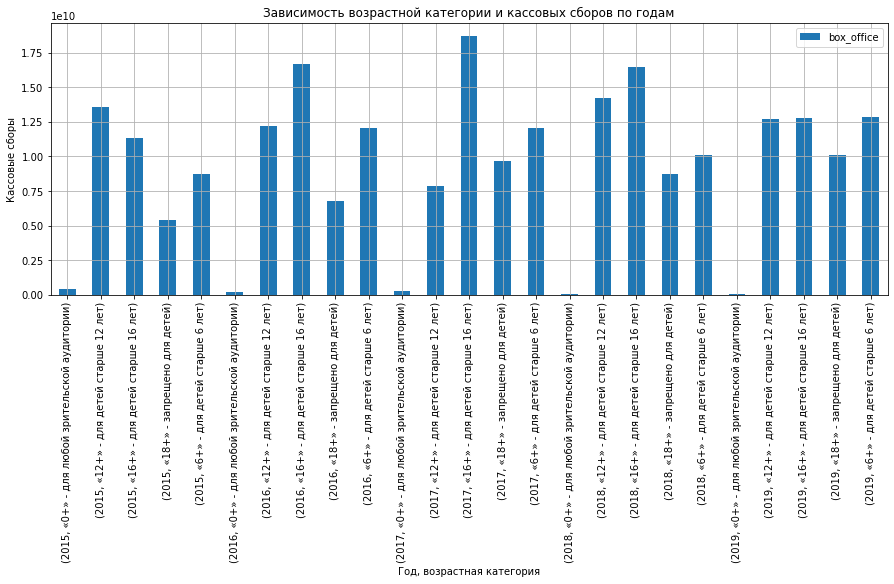

In [ ]:
# исследуем влияние возрастных ограничений по каждому году:
year_release_age_restriction_fees = data_year_release.pivot_table(index = ['year_release', 'age_restriction'], values = 'box_office', aggfunc = 'sum')
year_release_age_restriction_fees.plot(kind='bar', title = 'Зависимость возрастной категории и кассовых сборов по годам', style = 'o-', grid = True, xlabel = 'Год, возрастная категория', ylabel = 'Кассовые сборы', figsize=(15, 5))
display(year_release_age_restriction_fees.sort_values(by='box_office', ascending = False))

Статистика по максимальным сборам в зависимости от категории меняется год от года незначительно.  
По всем анализируемым годам минимальная сумма сборов остается у одной и той же категории 0+.  
В 2015 году максимальная сумма сборов у категории 12+  
В 2016 году максимальная сумма сборов у категории 16+  
В 2017 году максимальная сумма сборов у категории 16+  
В 2018 году максимальная сумма сборов у категории 16+  
В 2019 году максимальная сумма (с небольшими отклонениями друг от друга) сборов у категорий 12+, 16+, 6+  
Возможно, это связано с тем, что в основном в кино ходят дети старше 16 лет в компании со своими друзьями примерно такого же возраста.  

### 4. Исследуем фильмы, которые получили господдержку

In [ ]:
# создадим отдельный датафрейм с государственной поддержкой:
data_support = data.query('refundable_support > 0 or nonrefundable_support > 0 or financing_source != "unknown"')
# создадим столбец с размером гос. поддержки:
data_support['total_support'] = data_support['refundable_support'] + data_support['nonrefundable_support']
# создадим датафрейм с фильмами без гос. поддержки:
data_no_support = data.query('financing_source == "unknown"')
print('Доля гос. поддержки в бюджете, %:', (data_support['refundable_support'].sum() + data_support['nonrefundable_support'].sum()) / data_support['budget'].sum()*100)
print('Доля фильмов с гос. поддержкой, %:', data['financing_source'].count() / data['title'].nunique())

Доля гос. поддержки в бюджете, %: 44.26649119107681
Доля фильмов с гос. поддержкой, %: 1.1054341405788541


Из анализа видно, что в фильмах с гос. поддержкой размер поддержки в бюджете составляет в среднем 47%, а общая доля фильмов с гос. поддержкой составляет только 1%.

In [ ]:
# создадим в data индикатор фильмов с господдержкой и без:
def support(row):
    financing_source = row['financing_source']
    if financing_source != 'unknown':
        return 'support_on' # фильмы с господдержкой
    return 'support_off'    # фильмы без господдержки
data['film_support'] = data.apply(support, axis = 1)
display(data.head())

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year_release,main_director,main_genre,part_support_%,film_support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,unknown,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN,support_off
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,...,NaN,unknown,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN,support_off
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,support_off
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,support_off
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,unknown,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN,support_off


film_support
support_off   199,406,212,902.35
support_on     42,113,509,574.78
Name: box_office, dtype: float64

<AxesSubplot:title={'center':'Гистограмма кассовых сборов с гос. поддержкой и без неё'}, xlabel='Статус гос. поддержки', ylabel='Кассовые сборы'>

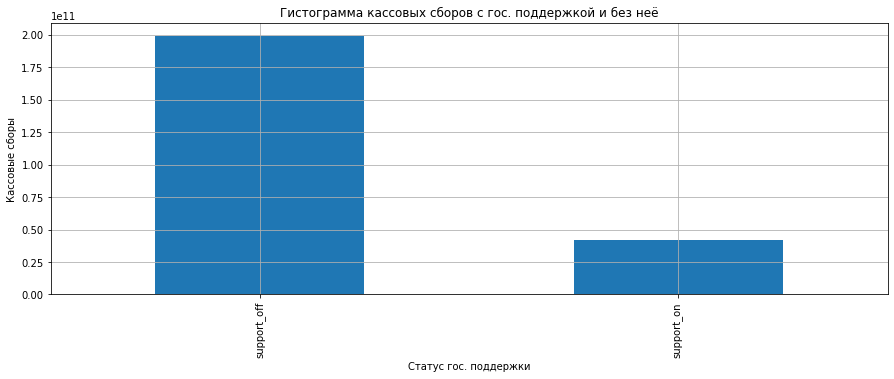

In [ ]:
# сравним размер сборов с гос. поддержкой и без
films_support_box_office_sum = data.groupby('film_support')['box_office'].sum()
display(films_support_box_office_sum)
films_support_box_office_sum.plot(kind='bar', title = 'Гистограмма кассовых сборов с гос. поддержкой и без неё', grid = True, xlabel = 'Статус гос. поддержки', ylabel = 'Кассовые сборы', figsize=(15, 5))

Логично, что кассовые сборы фильмов без гос. поддержки значительно превышают сборы фильмов без гос. поддержки, ведь фильмов с гос. поддержкой всего 1%.

,film_support,mean,median
0,support_off,"70,213,455.25","1,964,822.25"
1,support_on,"132,432,420.05","15,720,067.71"


<AxesSubplot:title={'center':'Гистограмма фильмов с гос. поддержкой и без неё'}, xlabel='Статус гос. поддержки', ylabel='Кассовые сборы'>

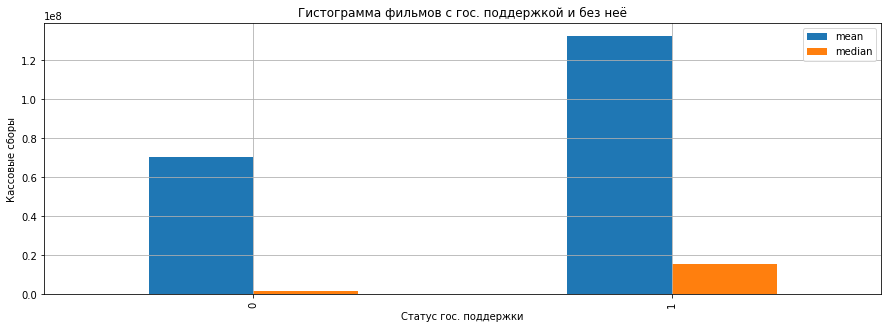

In [ ]:
# сравним среднее и медиану сборов с гос. поддержкой и без
films_support_box_office_mean_median = data.pivot_table(index = 'film_support', values = 'box_office', aggfunc = ('mean', 'median')).reset_index()
display(films_support_box_office_mean_median)
films_support_box_office_mean_median.plot(kind = 'bar', title = 'Гистограмма фильмов с гос. поддержкой и без неё', grid = True, xlabel = 'Статус гос. поддержки', ylabel = 'Кассовые сборы', figsize=(15, 5))

Более интересная картина при сравнении медиан и среднего.  
Фильмы с гос. поддержкой значительно опережают фильмы без гос. поддержки как по медианному значению кассовых сборов, так и по среднему значению.

In [ ]:
# посмотрим на какой тип фильма больше всего приходится гос. поддержка:
data_support_type = data_support.groupby('type')['pu_number'].count().sort_values(ascending = False)
display('Рейтинг типов фильмов с гос. поддержкой по количеству', data_support_type)
data_support_type_total_support = data_support.groupby('type')['total_support'].sum().sort_values(ascending = False)
display('Рейтинг типов фильмов с гос. поддержкой по деньгам', data_support_type_total_support)

# посмотрим на какой жанр фильма больше всего приходится гос. поддержка:
data_support_main_genre = data_support.groupby('main_genre')['pu_number'].count().sort_values(ascending = False)
display('Рейтинг жанров фильмов с гос. поддержкой по количеству',data_support_main_genre)
data_support_genre_total_support = data_support.groupby('main_genre')['total_support'].sum().sort_values(ascending = False)
display('Рейтинг типов фильмов с гос. поддержкой по деньгам', data_support_genre_total_support)

'Рейтинг типов фильмов с гос. поддержкой по количеству'

type
Художественный    300
Анимационный       31
Документальный      1
Name: pu_number, dtype: int64

'Рейтинг типов фильмов с гос. поддержкой по деньгам'

type
Художественный   17,627,198,847.00
Анимационный      2,570,489,465.00
Документальный        3,000,000.00
Name: total_support, dtype: float64

'Рейтинг жанров фильмов с гос. поддержкой по количеству'

main_genre
драма          93
комедия        74
мультфильм     31
unknown        16
триллер        15
мелодрама      15
фантастика     11
фэнтези        11
ужасы          10
военный         9
приключения     7
семейный        7
боевик          6
детектив        5
детский         4
история         4
мюзикл          4
криминал        3
биография       3
спорт           3
реальное ТВ     1
Name: pu_number, dtype: int64

'Рейтинг типов фильмов с гос. поддержкой по деньгам'

main_genre
драма         5,314,406,632.00
комедия       3,218,282,945.00
мультфильм    2,461,520,000.00
фантастика    1,406,000,000.00
фэнтези       1,032,900,000.00
история       1,020,000,000.00
триллер         769,645,285.00
приключения     696,000,000.00
unknown         688,969,465.00
детектив        485,000,000.00
спорт           455,000,000.00
военный         422,000,866.00
мелодрама       398,000,000.00
ужасы           355,000,000.00
семейный        339,000,000.00
боевик          334,000,000.00
криминал        280,000,000.00
мюзикл          240,453,119.00
детский         119,000,000.00
биография       112,510,000.00
реальное ТВ      53,000,000.00
Name: total_support, dtype: float64

Вывод:  
Фильмы, получающие большую гос. поддержку, относятся к типу Художественный и жанру Драма и Комедия.  
Это касается как количественных показателей, так и денежных.

age_restriction
«0+» - для любой зрительской аудитории     273,520,000.00
«12+» - для детей старше 12 лет          7,799,394,165.00
«16+» - для детей старше 16 лет          5,569,053,319.00
«18+» - запрещено для детей              1,012,346,881.00
«6+» - для детей старше 6 лет            5,546,373,947.00
Name: total_support, dtype: float64

<AxesSubplot:title={'center':'Зависимость возрастной категории и кассовых сборов'}, xlabel='Возрастная категория', ylabel='Кассовые сборы'>

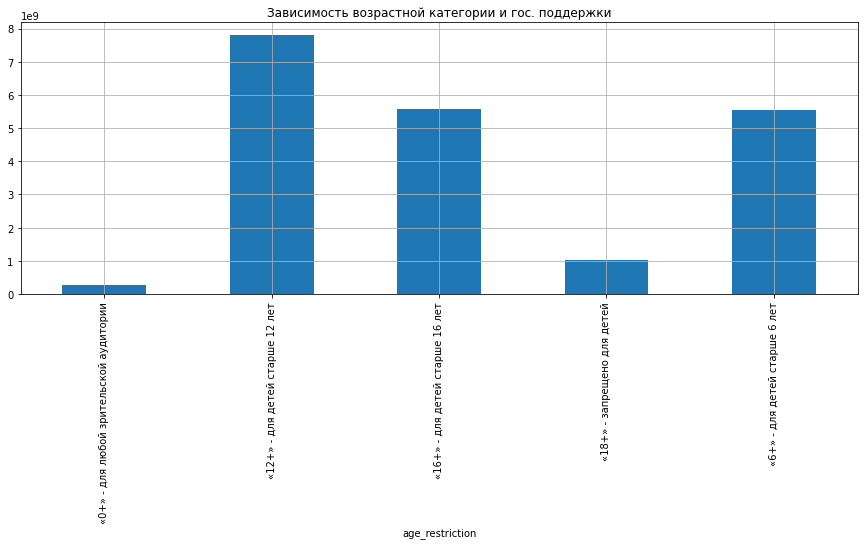

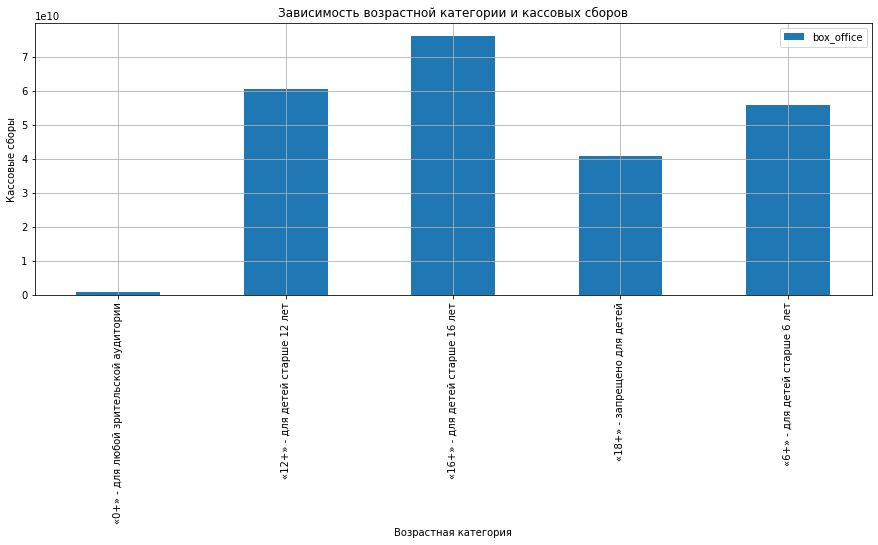

In [ ]:
# посмотрим на какую возрастную категорию выделяется больше денег из бюджета:
data_support_age_restriction = data_support.groupby('age_restriction')['total_support'].sum()#.sort_values(ascending = False)
display(data_support_age_restriction)
data_support_age_restriction.plot(kind='bar', title = 'Зависимость возрастной категории и гос. поддержки', grid = True, figsize=(15, 5))
age_restriction_fees.plot(kind='bar', title = 'Зависимость возрастной категории и кассовых сборов', style = 'o-', grid = True, xlabel = 'Возрастная категория', ylabel = 'Кассовые сборы', figsize=(15, 5))

Вывод: На возрастную категорию 12+ выделяется больше всего гос. поддержки. Но это не влияет на максимальные кассовые сборы.  
Максимальные кассовые сборы у категории 16+.

In [ ]:
# посмотрим медианный реитинг на фильмы с гос. поддержкой и без нее:
data = data[data['ratings'] != 'unknown']
data['ratings'] = data['ratings'].astype(float)
data_support_ratings = data.pivot_table(index = 'film_support', values = 'ratings', aggfunc = ('mean', 'median')).reset_index()
display(data_support_ratings)

,film_support,mean,median
0,support_off,6.51,6.60
1,support_on,6.02,6.20


Вывод: Гос. поддержка не оказывает положительное влияние на рейтинг фильма.  
    Медиана рейтингов фильмов с гос. поддержкой 6,2.
    Медиана рейтингов фильмов без гос. поддержки выше - 6,6.
    Среднее практически совпадает с медианой.

,box_office
type,
Художественный,"192,757,621,104.99"
Анимационный,"39,462,840,753.07"
Прочие,"252,210,952.89"
Документальный,"50,253,728.20"
Научно-популярный,"25,657,603.50"


<AxesSubplot:title={'center':'Сумма кассовых сборов по типу'}, xlabel='type'>

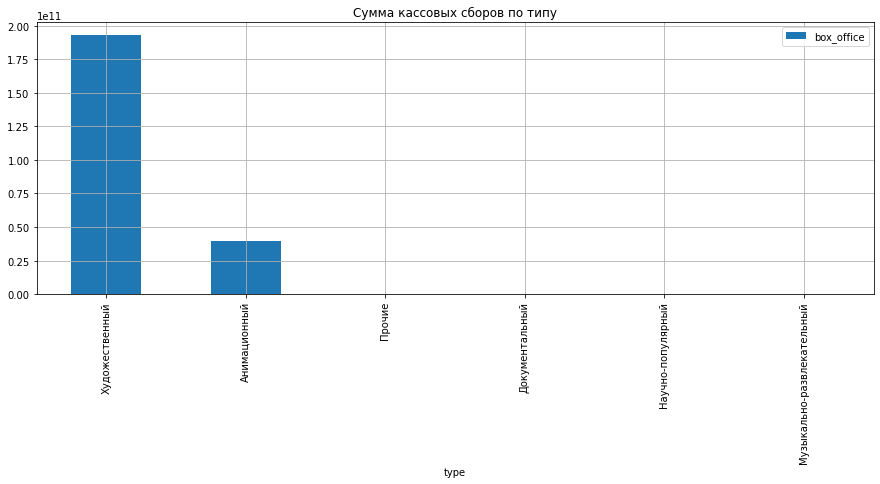

In [ ]:
# проанализируем на какой тип приходится больше всего кассовых сборов:
data_type_box_office = data.pivot_table(index = ['type'], values = 'box_office', aggfunc = ('sum')).sort_values(by = 'box_office', ascending = False)
display(data_type_box_office.head())
data_type_box_office.plot(kind='bar', title = 'Сумма кассовых сборов по типу', grid = True, figsize=(15, 5))

Максимальное количество сборов приходится на тип фильмов Художественный.

### 5. Общий вывод

От Министерства культуры Российской Федерации было получено задание изучить рынок российского кинопроката и выявить текущие тренды.  
  
  
В качестве исходных данных предоставлен набор данных с 2010 по 2019 год, который содержал информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.  

Результаты анализа следующие:  
1. Наибольшее количество фильмов вышло в 2010 году, наименьшее в 2017. После 2017 года виден положительный тренд в количестве ежегодно выходящих фильмов.  
2. С 2010 по 2018 год сумма кассовых сборов только росла. Но с 2019 года виден тренд на снижение кассовых сборов.  
3. В среднем за все исследуемые годы максимальные кассовые сборы у категории 16+, у категории 0+ минимальные.  
4. В 2015 году максимальное количество кассовых сборов было у категории 12+, с 2016 по 2018 у категории 16+, в 2019 году сумма сборов по категориям 6+, 12+, 16+ была наибольшей и выровнялась. Категория 0+ каждый год стабильно собирает наименьшее количество кассовых сборов.  
5. Общая доля фильмов с гос. поддержкой составляет 1% от общего количества.
6. Тем не менее медиана фильмов с гос. поддержкой выше на 88%, и среднее значение кассовых сборов фильмов с гос. поддержкой выше на 45%.
7. На тип художественный и жанр драма и комедия приходится большая часть гос. поддержки.
8. Больше всего выделяется гос. поддержки на категорию 12+. Но максимальные сборы у фильмов с гос. поддержкой у категории 16+.
9. Медианный рейтинг выше на 6% у фильмов без гос. поддержки.  
10. Максимальное количество кассовых сборов приходится на тип Художественный.

Общий вывод и рекоммендации:  
1. В целом наибольшее выделение гос. поддержки на тип фильма Художественный оправдано. Этот тип собирает наибольшее колличество кассовых сборов в денежном выражении.
2. Анализ показал,что медианные колличества кассовых сборов в денежном выражении фильмов с гос. поддержкой значительно превышают сборы без поддержки. Тем не менее можно повысить этот показатель за счет выделения средств в категорию 16+. Именно у этой категории самые высокие кассовые сборы.